In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

# Loading Data

In [2]:
headers = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv("imports-85.data", header=None, names=headers)
cars.head(5)

symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...    engine-size  \
0  convertible          rwd           front        88.6  ...            130   
1  convertible          rwd           front        88.6  ...            130   
2    hatchback          rwd           front        94.5  ...            152   
3        sedan          fwd           front        99.8  ...            109   
4        sedan          4wd           front        99.4  ...            136   

   fuel-system  bore  stroke compression-ratio horsepower  peak-rpm city-mpg  \
0         mpfi  3.47    2.68               9.0        111      5000       21   
1         mpfi  3.47    2.68               9.0        111      5000       21   
2         mpfi  2.68    3.47               9.0        154      5000       19   
3         mpfi  3.19    3.40              10.0        102      5500       24   
4         mpfi  3.19    3.40               8.0        115      5500       18   

  highway-mpg  price  
0          27  13495  
1          27  16500  
2          26  16500  
3          30  13950  
4          22  17450  

[5 rows x 26 columns]

# Data Cleaning

In [3]:
cars.replace('?', np.nan, inplace=True)

In [4]:
cars["normalized-losses"] = cars["normalized-losses"].astype("float")
cars["bore"] = cars["bore"].astype("float")
cars["stroke"] = cars["stroke"].astype("float")
cars["horsepower"] = cars["horsepower"].astype("float")
cars["peak-rpm"] = cars["peak-rpm"].astype("float")
cars["price"] = cars["price"].astype("float")

num_map = {"one": 1, "two": 2, "three": 3, "four": 4, "five": 5, "six": 6, "seven": 7, "eight": 8, "nine": 9, "ten": 10, "eleven": 11, "twelve":12}
cars["num-of-doors"] = cars["num-of-doors"].map(num_map)
cars["num-of-cylinders"] = cars["num-of-cylinders"].map(num_map)

In [5]:
cars = cars.drop(["make", "fuel-type", "aspiration", "body-style", "drive-wheels", "engine-location", "engine-type", "fuel-system"], axis=1)
cars["normalized-losses"] = cars["normalized-losses"].replace(np.nan, cars["normalized-losses"].mean())
cars = cars.dropna()

normalization:

In [6]:
cars = (cars - cars.mean()) / cars.std()

# Analysis with KNN

In [7]:
def knn_train_test(df, train_cols, test_col, k=5):
    X_train, X_test, y_train, y_test = train_test_split(df[train_cols],df[test_col], test_size=0.2)
    model = KNeighborsRegressor(k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return mean_squared_error(y_test, y_pred)**0.5

In [8]:
rmse_cols = pd.Series()
for col in cars.columns:
    if col != "price":
        rmse_cols[col] = knn_train_test(cars, [col], "price")
rmse_cols.sort_values()

engine-size          0.335149
curb-weight          0.366216
width                0.377158
city-mpg             0.453287
horsepower           0.477411
highway-mpg          0.485078
length               0.489702
num-of-cylinders     0.657708
stroke               0.723692
wheel-base           0.766319
compression-ratio    0.773170
bore                 0.858788
num-of-doors         1.101866
peak-rpm             1.131420
symboling            1.170443
normalized-losses    1.198691
height               1.241409
dtype: float64

In [9]:
cols = cars.columns.tolist()
cols.remove("price")
k_values = [1, 3, 5, 7, 9]
rmse_k_cols = pd.DataFrame(columns=cols, index=k_values)
for col in cols:
    for k in k_values:
        rmse_k_cols.loc[k, col] = knn_train_test(cars, [col], "price", k)
rmse_k_cols

symboling normalized-losses num-of-doors wheel-base    length     width  \
1   2.00971          0.800307      1.04634    0.30812  0.626879  0.660663   
3   1.05316          0.827801       1.0522   0.531192  0.527391  0.584708   
5   1.03725          0.856012       1.0925   0.703738  0.772566  0.351786   
7   1.22801          0.775906     0.888297   0.793286  0.600571  0.496419   
9   1.09697          0.968368     0.789936   0.561043   0.65781  0.490912   

     height curb-weight num-of-cylinders engine-size      bore    stroke  \
1   1.17917    0.520325         0.601457    0.437964  0.617349  0.820008   
3   1.16978    0.737056         0.708095    0.465353  0.720534   0.79429   
5  0.855874    0.773811         0.565361    0.358929   0.58324  0.870196   
7  0.924817    0.477388         0.719157    0.469732  0.954371  0.697765   
9   0.95737    0.618718         0.781719    0.439488  0.840765  0.962396   

  compression-ratio horsepower  peak-rpm  city-mpg highway-mpg  
1           0.74766   0.389554   1.15221  0.572513    0.770292  
3             0.703   0.426533  0.885915  0.487494    0.518837  
5          0.742027   0.473258   1.03082  0.639639     0.46127  
7          0.726645   0.597345   1.29493  0.489669     0.50658  
9          0.888327    0.48608  0.865909  0.628087    0.346819

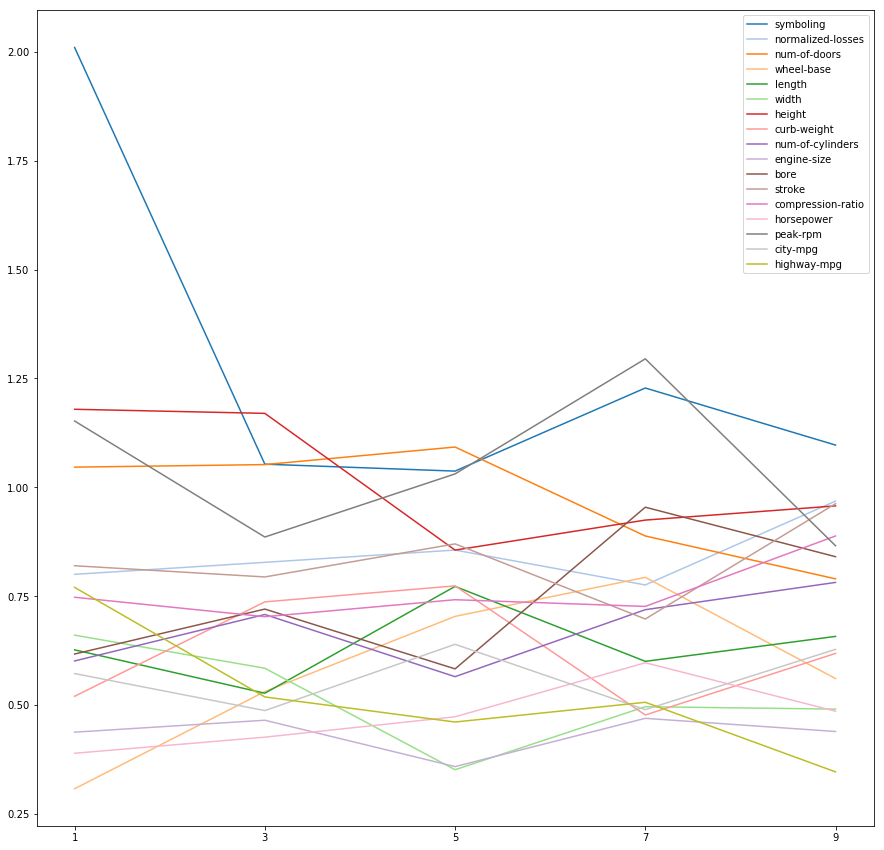

In [10]:
fig = plt.figure(figsize=(15,15))
for i in range(len(cols)):
    plt.plot(k_values, rmse_k_cols[cols[i]], c=plt.cm.tab20(i))
    plt.legend(loc = 'upper right')
    plt.xticks(k_values)
plt.show()

In [11]:
plt.cm.tab20(1)[0:3]

(0.68235294117647061, 0.7803921568627451, 0.90980392156862744)

In [12]:
features = rmse_cols.sort_values().index.tolist()
rmse_all = knn_train_test(cars, features, "price")
print("all features: "+str(rmse_all))
for i in range(2,6):
    rmse_i = knn_train_test(cars, features[0:i], "price")
    print("best "+str(i)+" features: "+str(rmse_i))

all features: 0.652663541797
best 2 features: 0.302753562589
best 3 features: 0.400465750195
best 4 features: 0.390409970693
best 5 features: 0.493252470828


Top 3 models are with 2, 3, 4 best features.

In [13]:
k_optimal = pd.DataFrame(columns=range(2,5), index=range(1,26))
for i in range(2,5):
    for k in range(1,26):
        k_optimal.loc[k, i] = knn_train_test(cars, features[0:i], "price", k)

In [14]:
for i in range(2,5):
    print(k_optimal[i].sort_values()[0:5])

5    0.195108
4     0.27748
8    0.316527
7    0.327295
6    0.333709
Name: 2, dtype: object
11    0.256156
16    0.260108
10    0.307022
5     0.310471
8     0.317186
Name: 3, dtype: object
1     0.296949
11    0.308461
3     0.339389
8     0.342405
23    0.366122
Name: 4, dtype: object


The optimal k varies with the random train-test splits. Perhaps it is becausethe dataset is not large enough. Generally, k around 5 with best 2 features performs well.